In [1]:
import pandas as pd

# 시간 유형 데이터
- 유형: 0000-00-00, 0000/00/00, 0000.00.00, 00000000
- -기호 붙으면 str로 인식함

In [3]:
dates = ["2020-01-01", "2020-03-01", "2020-09-01"]
dates

['2020-01-01', '2020-03-01', '2020-09-01']

# 형변환
## pd.to_datetime()
- 데이터를 날짜 타입으로 변환함

In [8]:
ts_dates = pd.to_datetime(dates)
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

## .to_period()
- 날짜 타입에서 특정 기간(년, 년-월, 년-월-일)형태로 추출
- freq=기간 형태 지정
  - "D": yyyy-mm-dd 형태
  - "M": yyyy-mm 형태
  - "Y": yyyy 형태

In [9]:
pr_day = ts_dates.to_period(freq="D")
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2020-09-01'], dtype='period[D]')

In [10]:
pr_month = ts_dates.to_period(freq="M")
pr_month

PeriodIndex(['2020-01', '2020-03', '2020-09'], dtype='period[M]')

In [11]:
pr_year = ts_dates.to_period(freq="Y")
pr_year

PeriodIndex(['2020', '2020', '2020'], dtype='period[A-DEC]')

In [17]:
# csv파일 로드할때 오류나면 encoding속성 지정
file_path = "./data/timeseries.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [16]:
df.describe()

,Close,Start,High,Low,Volume
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10580.000000,10800.000000,10960.000000,10268.000000,132117.200000
std,327.108545,145.773797,65.192024,317.600378,41297.484926
min,10100.000000,10550.000000,10900.000000,9990.000000,63039.000000
25%,10400.000000,10800.000000,10900.000000,10000.000000,133548.000000
50%,10700.000000,10850.000000,10950.000000,10150.000000,137977.000000
75%,10800.000000,10900.000000,11000.000000,10500.000000,155769.000000
max,10900.000000,10900.000000,11050.000000,10700.000000,170253.000000


In [19]:
df.head(1)

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977


In [21]:
# date 컬럼의 데이터를 날짜 타입으로 바꾸기
df["new_Date"] = pd.to_datetime(df["Date"])
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02


In [27]:
# new_Date 컬럼의 0번째 값 추출
df["new_Date"][0]
df["new_Date"].iloc[0]
df["new_Date"].loc[0]

Timestamp('2015-07-02 00:00:00')

In [32]:
# Date 컬럼 삭제
df.drop(["Date"], axis=1, inplace=True)
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


# 시계열 데이터 형태로 변환하기
- 시계열 데이터 형태: 날짜 타입 데이터를 인덱스 값으로 사용
# .set_index("인덱스로 지정할 컬럼")

In [34]:
df.set_index("new_Date", inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


# 기간 설정하기
# pd.date_range()
- start="기간의 시작 값"
- end="기간의 끝 값"
- periods=생성할 기간의 갯수
- freq="시간 간격 설정"(Y:년 단위, M:월 단위, D:일 단위, H:시간 단위, MIN:분 단위, S:초 단위)
  - freq="D H MIN S" --> 원하는 기간 설정 가능
- tz="시간대 지정(국가)

In [37]:
timestamp_df = pd.date_range(start="2020-01-01", 
                            end=None,
                            periods=6,
                            freq="Y",
                            tz="Asia/Seoul")
timestamp_df

DatetimeIndex(['2020-12-31 00:00:00+09:00', '2021-12-31 00:00:00+09:00',
               '2022-12-31 00:00:00+09:00', '2023-12-31 00:00:00+09:00',
               '2024-12-31 00:00:00+09:00', '2025-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='A-DEC')

In [42]:
pr_h = pd.period_range(start="2020-01-01",
                      end=None,
                      periods=3,
                      freq="2S")
pr_h

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:02',
             '2020-01-01 00:00:04'],
            dtype='period[2S]')

In [50]:
# 2020년 1월 1일부터 3개 기간 생성, 2일, 2시간, 2분, 2초씩 증가
pr = pd.period_range(start="2020-01-01",
                    end=None,
                    periods=3,
                    freq="2D 2H 2MIN 2S")
pr

PeriodIndex(['2020-01-01 00:00:00', '2020-01-03 02:02:02',
             '2020-01-05 04:04:04'],
            dtype='period[180122S]')

# 특정 날짜 추출
# .dt.~
- datetime properties
- 날짜 값의 속성 추출
  - dt.year
  - dt.month
  - dt.day

In [51]:
df = pd.read_csv(file_path)
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [53]:
df["new_Date"] = pd.to_datetime(df["Date"])
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02


In [55]:
df["Year"] = df["new_Date"].dt.year
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015


In [56]:
df["Month"] = df["new_Date"].dt.month
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7


In [57]:
df["day"] = df["new_Date"].dt.day
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2


In [61]:
df["Date_ym"] = df["new_Date"].dt.to_period(freq="M")
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day,Date_ym
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015-07


In [62]:
df["Date_ymd"] = df["new_Date"].dt.to_period(freq="D")
df.head(1)

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day,Date_ym,Date_ymd
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015-07,2015-07-02


In [71]:
df.set_index("new_Date", inplace=True)

In [72]:
df.loc["2015-07-02"]

Date        2015-07-02
Close            10100
Start            10850
High             10900
Low              10000
Volume          137977
Year              2015
Month                7
day                  2
Date_ym        2015-07
Date_ymd    2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [75]:
df.loc["2015-07-02":"2018-06-29"]

,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_ym,Date_ymd
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015-07,2015-07-02
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016-06,2016-06-29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017-06,2017-06-28
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018-06,2018-06-27


In [77]:
df = pd.read_csv(file_path)
df["new_Date"] = pd.to_datetime(df["Date"])
df.set_index("new_Date", inplace=True)

In [78]:
df

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977
2016-06-29,2016-06-29,10700,10550,10900,9990,170253
2017-06-28,2017-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2019-06-26,2019-06-26,10800,10900,11000,10700,63039


# 시계열 데이터로 시각화
## df.plot()
- x축: 인덱스 값
- y축: 컬럼들 전체 데이터 중에 최소~최대 범위 값(숫자 데이터)
- 선: 모든 컬럼들(숫자 데이터)

<AxesSubplot: xlabel='new_Date'>

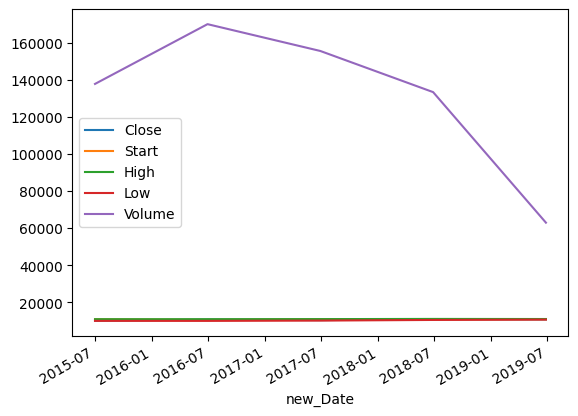

In [79]:
df.plot()